<a href="https://colab.research.google.com/github/ariaanthor/Tennis-Server-Analyzer-VOC-Dataset/blob/main/Tennis_Serve_Analyzer_enhanced_trajectory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Links to Google Drive darknetgd and prototypegd
import os
import gdown
import sys

from google.colab import drive
drive.mount('/content/drive')


# Setup softlinks to google drive so that we can save data accross sessions
# all names (links) ending with gd are links to Google Drive
# Allnames (directories) ending with vm are directly on the Runtime vm and will 
# be lost when Collab notebook is disconnected
# We will run darkent from darknetgd so that all teh weights are saved accross
# collab sessions.
%cd /content/

#import the image helper functions
sys.path.insert(0,'/content/drive/MyDrive/Prototype/HelperFunctions')
import colab_helper
#code=4/1AY0e-g4K-wyjJ6nl1dGkcAru4NGaHNGz4Y2MEVAfWrtii8GR4B9EpImef2E


!rm -f /content/prototypegd
!ln -s "/content/drive/MyDrive/Prototype"  /content/prototypegd
!ls -l /content/prototypegd




Mounted at /content/drive
/content


ModuleNotFoundError: ignored

In [ ]:
%cd /content/
!tar cvf darknetgd_20210313.tar darknet
!cp  darknetgd_20210313.tar /content/prototypegd/

/content
darknet/
darknet/bounding_box.txt
darknet/backup/
darknet/libdarknet.a
darknet/scripts/
darknet/scripts/get_coco_dataset.sh
darknet/scripts/dice_label.sh
darknet/scripts/gen_tactic.sh
darknet/scripts/voc_label.py
darknet/scripts/imagenet_label.sh
darknet/LICENSE.mit
darknet/data/
darknet/data/labels/
darknet/data/labels/54_2.png
darknet/data/labels/101_5.png
darknet/data/labels/56_7.png
darknet/data/labels/76_1.png
darknet/data/labels/52_3.png
darknet/data/labels/66_1.png
darknet/data/labels/90_5.png
darknet/data/labels/124_0.png
darknet/data/labels/36_4.png
darknet/data/labels/73_2.png
darknet/data/labels/121_2.png
darknet/data/labels/35_3.png
darknet/data/labels/57_7.png
darknet/data/labels/88_1.png
darknet/data/labels/44_6.png
darknet/data/labels/103_2.png
darknet/data/labels/87_7.png
darknet/data/labels/107_4.png
darknet/data/labels/44_1.png
darknet/data/labels/101_3.png
darknet/data/labels/104_5.png
darknet/data/labels/61_4.png
darknet/data/labels/54_3.png
darknet/data/la

In [ ]:
%cd /content/prototypegd/
#!rm -rf /content/prototypegd/Videos/Video1
#!tar cf darknetgd.tar darknet
#!ls -l 
#!cp darknetgd.tar prototypegd



/content/drive/MyDrive/Prototype


In [ ]:
#@title copy darknet to vm for speed
%cd /content/
#!tar xf /content/prototypegd/darknet_cudnn.tar
!tar xf /content/prototypegd/darknetgd_20210313.tar
%cd /content/darknet/



/content
/content/darknet


In [ ]:
#@title make again with changes to image etc
%cd /content/darknet
!make

/content/darknet
make: Nothing to be done for 'all'.


In [ ]:
#@title Image show Helper Functions (only once)

def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  

In [ ]:
#@title Copy the correct weights
%cd /content/darknet/
!rm -rf /content/darknetgd
!rm -rf backup/
!mkdir backup/
#!cp -r /content/prototypegd/darknet/backup-2021-02-19/* backup
!cp /content/prototypegd/darknet/cfg/yolov3-608* cfg
%cd /content
!mkdir darknetgd
!cp -r /content/darknet/* darknetgd



/content/darknet
/content


In [ ]:
%cd /content/darknet
!find . -type f | grep predictions.jpg

/content/darknet


In [ ]:
#@title Running Darknet on trained Weights
%cd /content/darknet/
!pwd
!chmod +755 darknet
!rm -f /content/prototypegd/darknet/predictions.jpg
!rm -f /content/darknet/predictions.jpg
#!./darknet detector test cfg/voc.data cfg/yolov2-voc.cfg backup/yolov2-voc_300.weights data/person.jpg

!./darknet detect cfg/yolov3.cfg backup/yolov3-voc_last.weights data/dog.jpg -thresh 0.6

#!./darknet detect cfg/yolov3.cfg cfg/yolov3-608.weights data/person.jpg 
!./darknet detect cfg/yolov3.cfg cfg/yolov3-608.weights /content/prototypegd/Serves/Frames/frame39.jpg | grep  "Bounding Box" > /content/prototypegd/Serves/bbox_text/bounding_box.txt

#!./darknet detect cfg/yolov3.cfg cfg/yolov3-608.weights /content/prototypegd/Serves/IMG_4981.jpg 
# 
#!./darknet detect cfg/yolov3.cfg darknet53.conv.74 data/person.jpg 

/content/darknet
/content/darknet
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   

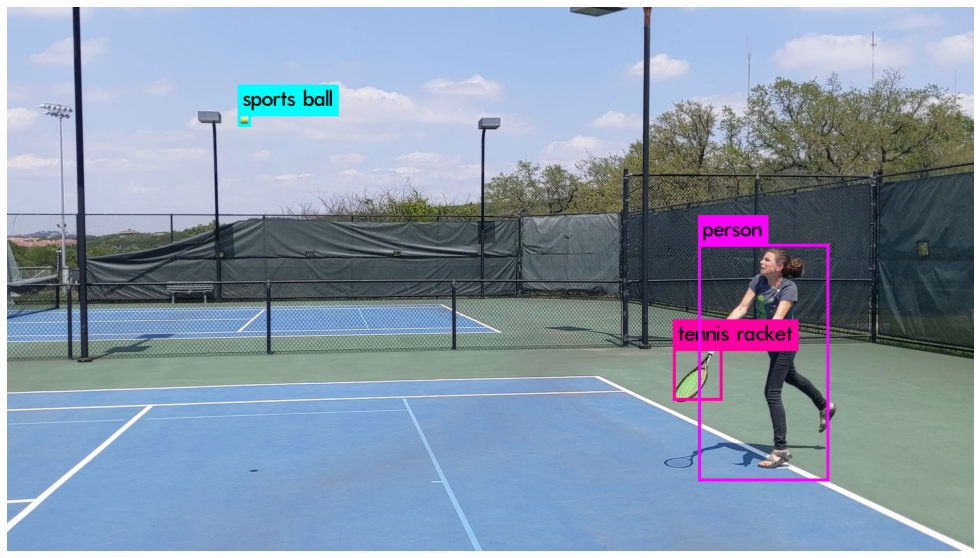

In [ ]:
imShow('/content/darknet/predictions.jpg')

#By the end of today I will...

#1. Read bounding box file for 1 image
#2. ascertain whether the ball has made contact with the racket
#3. use 2 or 3 frames after point of contact to calculate speed of the ball

In [ ]:
#@title Duplicate, don't run
class Labeled_Object():
  def __init__(self, label, left, right, top, bot):
    self.label = label
    self.left = left
    self.right = right
    self.top = top
    self.bot = bot
  
  def center(self):
    print ((self.left + self.right)/2, (self.top + self.bot)/2)
    return ((self.left + self.right)/2, (self.top + self.bot)/2)


In [ ]:
#@title Duplicate, don't run
import math as M

class Frame():
  racket = None
  ball = None
  def __init__(self, framename):
    self.racket=None
    self.ball=None

  def fprint(self):
    print("printing frame", racket, ball)
    
  def M_racket(self, r):
    self.racket=r

  def M_ball(self, b):
    self.ball=b
    
  def how_close(self):
    print("in here 2", self.ball, self.racket)
    (x_ball, y_ball) = (self.ball).center()
    (x_racket, y_racket) = (self.racket).center()
    return M.sqrt((x_ball - x_racket)**2 + (y_ball - y_racket)**2)


In [ ]:
#@title Duplicate, don't run
%cd /content/darknet/
path = '/content/darknet'

import os
# Make method take parameter of text file name and    
def return_frame_vals(filename):
    print(filename)
    b = False
    left = 0
    right = 0
    top = 0
    bot = 0
    #path = path + "/{}".format(filename)
    if "bounding_box" in filename:
        print("processing file")
        f = open(filename, 'r')

        file_text = f.readlines()
        newFrame = Frame(filename)
        for line in file_text:
            print("line1",line)
            split_line = line.split(", ")
            b = False
            for entry in split_line:
                print (entry)
                if "tennis racket" in entry:
                  racket = True
                 # print("Ariaan racket")
                  label = "tennis racket"
                elif "sports ball" in entry:
                  ball = True
                  label = "tennis ball"
                  #print("Ariaan ball")
                  
                if "Left" in entry:
                  split_entry = entry.split("=")
                  left = int(split_entry[1])
                  #print("Ariaan left")

                if "Right" in entry:
                  split_entry = entry.split("=")
                  right = int(split_entry[1])
                 # print("Ariaan right")

                if "Top" in entry:
                  split_entry = entry.split("=")
                  top = int(split_entry[1])
              #    print("Ariaan top")

                if "Bottom" in entry:
                  split_entry = entry.split("=")
                  bot = int(split_entry[1])
                #  print("Ariaan bot")
               # print("in here 4", label)
            if label is "tennis ball" or label is "tennis racket":
            #  print("in here 2", label, left, right, top, bot)
              lb=Labeled_Object(label, left, right, top, bot)
            if label is "tennis ball":
             # print("in here 1")
              newFrame.M_ball(lb)
              print(label, left, right, top, bot)
            elif label is "tennis racket":
              #print("in here 3")
              #print(lb)
            # print(newFrame)
              print(label, left, right, top, bot)
              newFrame.M_racket(lb)
        return newFrame          
            

/content/darknet


In [ ]:
import pprint
Frames = []
dir = '/content/prototypegd/Serves/bbox_text'
for file in os.listdir(dir):
  #print(file)
  file = "{}/{}".format(dir, file)
  frame = return_frame_vals(file)
  if frame is not None:
    Frames.append(frame)
#pprint.pprint(Frames)
for frame in Frames:
  print(frame)
  print(frame.how_close())

/content/prototypegd/Serves/bbox_text/bounding_box0.txt
processing file
Bounding Box: label=tennis racket
Left=1760
Top=458
Right=1911
Bottom=538

tennis racket 1760 1911 458 538
Bounding Box: label=sports ball
Left=1433
Top=211
Right=1452
Bottom=226

tennis ball 1433 1452 211 226
tennis ball 19.0 15.0
Bounding Box: label=person
Left=1457
Top=407
Right=1823
Bottom=907

/content/prototypegd/Serves/bbox_text/bounding_box1.txt
processing file
Bounding Box: label=tennis racket
Left=1760
Top=460
Right=1908
Bottom=529

tennis racket 1760 1908 460 529
Bounding Box: label=person
Left=1455
Top=408
Right=1822
Bottom=908

Could not find both ball and racket. This frame will be ignored
/content/prototypegd/Serves/bbox_text/bounding_box2.txt
processing file
Bounding Box: label=tennis racket
Left=1758
Top=463
Right=1906
Bottom=523

tennis racket 1758 1906 463 523
Bounding Box: label=sports ball
Left=1435
Top=207
Right=1452
Bottom=221

tennis ball 1435 1452 207 221
tennis ball 17.0 14.0
Bounding Box:

In [ ]:
import os
import math as M
class Labeled_Object:
    def __init__(self, label, left, right, top, bot):
        self.label = label
        self.left = left
        self.right = right
        self.top = top
        self.bot = bot

    def center(self):
        print(self.label, (self.left + self.right) / 2, (self.top + self.bot) / 2)
        return (self.left + self.right) / 2, (self.top + self.bot) / 2

    def size(self):
        print(self.label, M.fabs(self.right - self.left), M.fabs(self.bot - self.top))
        return M.fabs(self.right - self.left), M.fabs(self.bot - self.top)


class Frame:
    racket = None
    ball = None
    size = None

    def __init__(self, framename):
        self.racket = None
        self.ball = None

    def fprint(self):
        print("printing frame", racket, ball)

    def M_racket(self, r):
        self.racket = r

    def M_ball(self, b):
        self.ball = b
    
    def M_ball_size(self, s):
      self.size = s

    def how_close(self):
        #print("in here 2", self.ball, self.racket)
        (x_ball, y_ball) = self.ball.center()
        (x_racket, y_racket) = self.racket.center()
        return M.sqrt((x_ball - x_racket) ** 2 + (y_ball - y_racket) ** 2)


# Make method take parameter of text file name and
def return_frame_vals(filename):
    print(filename)
    b = False
    left = 0
    right = 0
    top = 0
    bot = 0
    # path = path + "/{}".format(filename)
    if "bounding_box" in filename:
        print("processing file")
        f = open(filename, 'r')

        file_text = f.readlines()
        newFrame = Frame(filename)
        for line in file_text:
            #print("line1", line)
            split_line = line.split(", ")
            b = False
            for entry in split_line:
                print(entry)
                if "tennis racket" in entry:
                    racket = True
                  #  print("Ariaan racket")
                    label = "tennis racket"

                elif "sports ball" in entry:
                    ball = True
                    label = "tennis ball"
                  #  print("Ariaan ball")

                elif "Left" in entry:
                    split_entry = entry.split("=")
                    left = int(split_entry[1])
                    # print("Ariaan left")

                elif "Right" in entry:
                    split_entry = entry.split("=")
                    right = int(split_entry[1])
                # print("Ariaan right")

                elif "Top" in entry:
                    split_entry = entry.split("=")
                    top = int(split_entry[1])
                #    print("Ariaan top")

                elif "Bottom" in entry:
                    split_entry = entry.split("=")
                    bot = int(split_entry[1])
                #  print("Ariaan bot")
                else:
                    label = "Irrelivant object"
            if label is "tennis ball" or label is "tennis racket":
                #  print("in here 2", label, left, right, top, bot)
                lb = Labeled_Object(label, left, right, top, bot)
            if label is "tennis ball":
                #print("in here 1")
                newFrame.M_ball(lb)
                print(label, left, right, top, bot)
                newFrame.M_ball
                w, l = lb.size()
                size = (w+l)/2
                newFrame.M_ball_size(size)
            elif label is "tennis racket":
                #print("in here 3")
                # print(lb)
                # print(newFrame)
                print(label, left, right, top, bot)
                newFrame.M_racket(lb)
        if (newFrame.ball is None or newFrame.racket is None):
          #don't return anything
          print("Could not find both ball and racket. This frame will be ignored")
          return None
        return newFrame


def closest_to_POC(file = None):
    Frames = {}
    closest_frame = None
    closest_frame_val = 1000000000000000
    dir = '/content/prototypegd/Serves/bbox_text'
    #dir = 'G:\\.shortcut-targets-by-id\\1q5l9VQDOX-4cTD2nwIWFX-Q8OZ8xkgve\\Prototype\\Serves\\bbox_text'
    if file is not None:
      frame = return_frame_vals(file)
      if frame is not None:
        frame_val_x, frame_val_y = frame.ball.center()
        return frame, frame_val_x, frame_val_y, frame.size
      else:
        return frame, None, None, 0
      
    for file in os.listdir(dir):
        # print(file)
        file = "{}/{}".format(dir, file)
        frame = return_frame_vals(file)
        if frame is not None:
            Frames[file] = frame

    # pprint.pprint(Frames)
    cnt = 0;
    for link, frame in Frames.items():
        if frame.how_close() < closest_frame_val:
            closest_frame_val = frame.how_close()
            closest_frame = link

    print("The frame closest to POC is: ", closest_frame)
    print("The distance between the racket and ball is: ", closest_frame_val)
    return closest_frame, closest_frame_val


In [ ]:
#@title Clear Frames directory IF WANTED
#!rm -rf /content/drive/MyDrive/Prototype/Serves
#!mkdir /content/drive/MyDrive/Prototype/Serves
#!mkdir /content/drive/MyDrive/Prototype/Serves/bbox_text
#!mkdir /content/drive/MyDrive/Prototype/Serves/Frames

In [ ]:
# Program To Read video
# and Extract Frames
import cv2
import os
# Function to extract frames
def FrameCapture(path):
  # Path to video file
  vidObj = cv2.VideoCapture(path)
  # Used as counter variable
  count = 0
  success = 1
  while success:
    # vidObj object calls read
    # function extract frames
    success, image = vidObj.read()
    if image is not None:
      os.chdir('/content/prototypegd/Serves/Frames')
      # Saves the frames with frame-count
      cv2.imwrite("frame%d.jpg" % count, image)
    else:
      break
    count += 1


#FrameCapture("/content/prototypegd/Videos/Neidhart_Serve_Test.mp4")


In [ ]:
import os
%cd /content/darknet/
dir = '/content/prototypegd/Serves/Frames'
#!chmod 777 -R /content/prototypegd/Serves/Frames/
#!ls -l /content/prototypegd/Serves/Frames/frame0.jpg
for filename in os.listdir(dir):
  link = os.path.join(dir, filename)
  print(link, type(link))
  bbox_name = os.path.basename(filename)
  print(bbox_name, type(bbox_name))
  bbox_name = bbox_name.replace('frame', 'bounding_box')
  bbox_name = bbox_name.replace('.jpg', '.txt')
  bbox_path = os.path.join('/content/prototypegd/Serves/bbox_text/', bbox_name)
  print(bbox_path, type(bbox_path))
  !./darknet detect cfg/yolov3.cfg cfg/yolov3-608.weights $link | grep  "Bounding Box" > $bbox_path

Streaming output truncated to the last 5000 lines.
   83 route  79
   84 conv    256  1 x 1 / 1    19 x  19 x 512   ->    19 x  19 x 256  0.095 BFLOPs
   85 upsample            2x    19 x  19 x 256   ->    38 x  38 x 256
   86 route  85 61
   87 conv    256  1 x 1 / 1    38 x  38 x 768   ->    38 x  38 x 256  0.568 BFLOPs
   88 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   89 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   90 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   91 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   92 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   93 conv    255  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 255  0.377 BFLOPs
   94 yolo
   95 route  91
   96 conv    128  1 x 1 / 1    38 x  38 x 256   ->    38 x  38 x 128  0.095 BFLOPs
   97 upsample            2x    38 x  38 x 128   ->    76 x  

In [ ]:
#@title Speed method
ball_coords = []

def distance(b1, b2):
  x1, y1 = b1
  x2, y2 = b2
  return M.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def get_speed(num_Frames = None):
  global ball_coords
  ball_coords = []
  num_frames_for_speed = num_Frames
  proportion = 2.575
  size = 0
  filename = None
  pix_per_sec = 0
  f = closest_to_POC()
  img_num = str(f[0])
  img_num = os.path.basename(img_num)
  img_num = img_num.strip("bounding_box")
  img_num = int(img_num.strip(".txt"))
#  print(type(img_num), img_num)
  for i in range(num_frames_for_speed):
    dir = '/content/prototypegd/Serves/bbox_text/bounding_box'
    file = dir + str(img_num + i)
    filename = file + ".txt"
    #print(filename)
    frame, dist_x, dist_y, s = closest_to_POC(file = filename)
    size += s
  #  print(dist)
    ball = (dist_x, dist_y)
   # if dist_x is not None and dist_y is not None:
    ball_coords.append(ball)
    last_frame = 9999999
  for i in range(num_frames_for_speed - 1, 0, -1):
    if ball_coords[i][0] is not None:
      last_frame = i
      break

  print("Last Frame = ", last_frame)
  pix_per_sec = distance(ball_coords[0], ball_coords[last_frame])
  pix_per_sec = pix_per_sec/(last_frame)
  size = 26
 # print(pix_per_sec, size)
  proportion *= (pix_per_sec/size)
 # print("inches per pixel", proportion)
  proportion = proportion/63360
 # print("miles per pixel", proportion)
  proportion = proportion*60
 # print("miles per second", proportion)
  proportion*=3600
 # print("miles per hour", proportion)
  return(proportion)

In [ ]:
speed_arr = []
for i in range(20):
  speed = get_speed(i+2)
  speed_arr.append(M.fabs(speed))

print(speed_arr)
print(ball_coords)

Streaming output truncated to the last 5000 lines.
Bottom=237

tennis ball 458 484 211 237
tennis ball 26.0 26.0
Bounding Box: label=person
Left=1372
Top=470
Right=1632
Bottom=941

/content/prototypegd/Serves/bbox_text/bounding_box40.txt
processing file
Bounding Box: label=tennis racket
Left=1351
Top=693
Right=1417
Bottom=809

tennis racket 1351 1417 693 809
Bounding Box: label=sports ball
Left=334
Top=202
Right=361
Bottom=224

tennis ball 334 361 202 224
tennis ball 27.0 22.0
Bounding Box: label=person
Left=1387
Top=464
Right=1659
Bottom=935

/content/prototypegd/Serves/bbox_text/bounding_box41.txt
processing file
Bounding Box: label=tennis racket
Left=1371
Top=692
Right=1435
Bottom=830

tennis racket 1371 1435 692 830
Bounding Box: label=sports ball
Left=203
Top=187
Right=228
Bottom=214

tennis ball 203 228 187 214
tennis ball 25.0 27.0
Bounding Box: label=person
Left=1401
Top=475
Right=1651
Bottom=924

/content/prototypegd/Serves/bbox_text/bounding_box42.txt
processing file
Bounding